1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. Load Datasets 

customer = pd.read_csv("C:\\Users\\yashp\\Downloads\\Customer.csv")
transactions = pd.read_csv("C:\\Users\\yashp\\Downloads\\Transactions.csv")
prod_cat_info = pd.read_csv("C:\\Users\\yashp\\Downloads\\prod_cat_info.csv")


In [5]:
print(transactions.columns)
print(prod_cat_info.columns)
print(customer.columns)


Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')
Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')
Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')


In [7]:
print(transactions.columns.tolist())


['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type']


In [8]:
transactions.rename(columns={'prod_subcat_code': 'prod_sub_cat_code'}, inplace=True)


In [9]:
txn_prod = transactions.merge(prod_cat_info, on='prod_sub_cat_code', how='left')


In [12]:
customer = pd.read_csv("C:\\Users\\yashp\\Downloads\\Customer.csv")
print("Customer columns:", customer.columns.tolist())

Customer columns: ['customer_Id', 'DOB', 'Gender', 'city_code']


In [13]:
# Rename the column to match the merge key
if 'Customer_ID' in customer.columns:
    customer.rename(columns={'Customer_ID': 'customer_Id'}, inplace=True)
elif 'cust_id' in customer.columns:
    customer.rename(columns={'cust_id': 'customer_Id'}, inplace=True)


In [16]:
print("Transactions columns:", transactions.columns.tolist())
print("Customer columns:", customer.columns.tolist())


Transactions columns: ['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type']
Customer columns: ['customer_Id', 'DOB', 'Gender', 'city_code']


In [17]:
# For transactions
if 'Customer_ID' in transactions.columns:
    transactions.rename(columns={'Customer_ID': 'customer_Id'}, inplace=True)

# For customer
if 'Customer_ID' in customer.columns:
    customer.rename(columns={'Customer_ID': 'customer_Id'}, inplace=True)


In [19]:
# Fix for transactions
if 'Customer_ID' in transactions.columns:
    transactions.rename(columns={'Customer_ID': 'customer_Id'}, inplace=True)
elif 'cust_id' in transactions.columns:
    transactions.rename(columns={'cust_id': 'customer_Id'}, inplace=True)
elif 'customerid' in transactions.columns:
    transactions.rename(columns={'customerid': 'customer_Id'}, inplace=True)
elif 'customer id' in transactions.columns:
    transactions.rename(columns={'customer id': 'customer_Id'}, inplace=True)

# Fix for customer
if 'Customer_ID' in customer.columns:
    customer.rename(columns={'Customer_ID': 'customer_Id'}, inplace=True)
elif 'cust_id' in customer.columns:
    customer.rename(columns={'cust_id': 'customer_Id'}, inplace=True)
elif 'customerid' in customer.columns:
    customer.rename(columns={'customerid': 'customer_Id'}, inplace=True)
elif 'customer id' in customer.columns:
    customer.rename(columns={'customer id': 'customer_Id'}, inplace=True)


In [20]:
transactions['customer_Id'] = transactions['customer_Id'].astype(str)
customer['customer_Id'] = customer['customer_Id'].astype(str)


3. Merge Datasets

In [21]:
txn_prod = transactions.merge(prod_cat_info, on='prod_sub_cat_code', how='left')
customer_final = txn_prod.merge(customer, on='customer_Id', how='inner')


Question2: Summary Report
a. column Names and Data Types

In [22]:
customer_final.dtypes


transaction_id         int64
customer_Id           object
tran_date             object
prod_sub_cat_code      int64
prod_cat_code_x        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat_code_y        int64
prod_cat              object
prod_subcat           object
DOB                   object
Gender                object
city_code            float64
dtype: object

b. Top/Bottom 10 Observation

In [23]:
customer_final.head(10)
customer_final.tail(10)


,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat,DOB,Gender,city_code
57156,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,3,Electronics,Audio and video,27-12-1972,M,5.0
57157,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,5,Books,Non-Fiction,27-12-1972,M,5.0
57158,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,6,Home and kitchen,Kitchen,27-12-1972,M,5.0
57159,58531412371,274935,29-01-2011,10,5,4,104,43.68,459.68,Flagship store,3,Electronics,Audio and video,09-09-1977,F,3.0
57160,58531412371,274935,29-01-2011,10,5,4,104,43.68,459.68,Flagship store,5,Books,Non-Fiction,09-09-1977,F,3.0
57161,58531412371,274935,29-01-2011,10,5,4,104,43.68,459.68,Flagship store,6,Home and kitchen,Kitchen,09-09-1977,F,3.0
57162,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,1,Clothing,Mens,21-01-1984,F,4.0
57163,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,2,Footwear,Kids,21-01-1984,F,4.0
57164,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,3,Electronics,Mobiles,21-01-1984,F,4.0
57165,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,4,Bags,Women,21-01-1984,F,4.0


c. Five-Number Summary(Continuous Variables)

In [24]:
continuous_vars = customer_final.select_dtypes(include=['int64', 'float64'])
continuous_vars.describe().T[['min', '25%', '50%', '75%', 'max']]


,min,25%,50%,75%,max
transaction_id,3268991.000,2.527880e+10,5.019132e+10,7.551116e+10,9.998755e+10
prod_sub_cat_code,1.000,3.000000e+00,4.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code_x,1.000,2.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.120000e+02,7.090000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.849000e+01,1.993425e+02,3.649800e+02,7.875000e+02
total_amt,-8270.925,7.646600e+02,1.759160e+03,3.553680e+03,8.287500e+03
prod_cat_code_y,1.000,2.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


d. Frequency Tables(Categorical Variables)

In [25]:
categorical_vars = customer_final.select_dtypes(include='object')
for col in categorical_vars.columns:
    print(f"\nFrequency table for {col}:\n", customer_final[col].value_counts())



Frequency table for customer_Id:
 269245    36
267801    35
271797    35
271834    34
275252    34
          ..
271777     1
273784     1
272093     1
273332     1
270345     1
Name: customer_Id, Length: 5506, dtype: int64

Frequency table for tran_date:
 25-11-2012    90
13-07-2011    89
7/10/2011     86
15-09-2013    85
4/1/2013      85
              ..
24-02-2014     3
28-02-2014     3
23-02-2014     2
21-02-2014     1
27-02-2014     1
Name: tran_date, Length: 1129, dtype: int64

Frequency table for Store_type:
 e-Shop            23087
MBR               11644
Flagship store    11324
TeleShop          11111
Name: Store_type, dtype: int64

Frequency table for prod_cat:
 Books               12179
Clothing            10019
Footwear            10019
Electronics          9910
Home and kitchen     8087
Bags                 6952
Name: prod_cat, dtype: int64

Frequency table for prod_subcat:
 Women                  10019
Mens                    9902
Kids                    7069
Mobiles     

Question 3: Visualizations
Histograms for Continuous Variables 

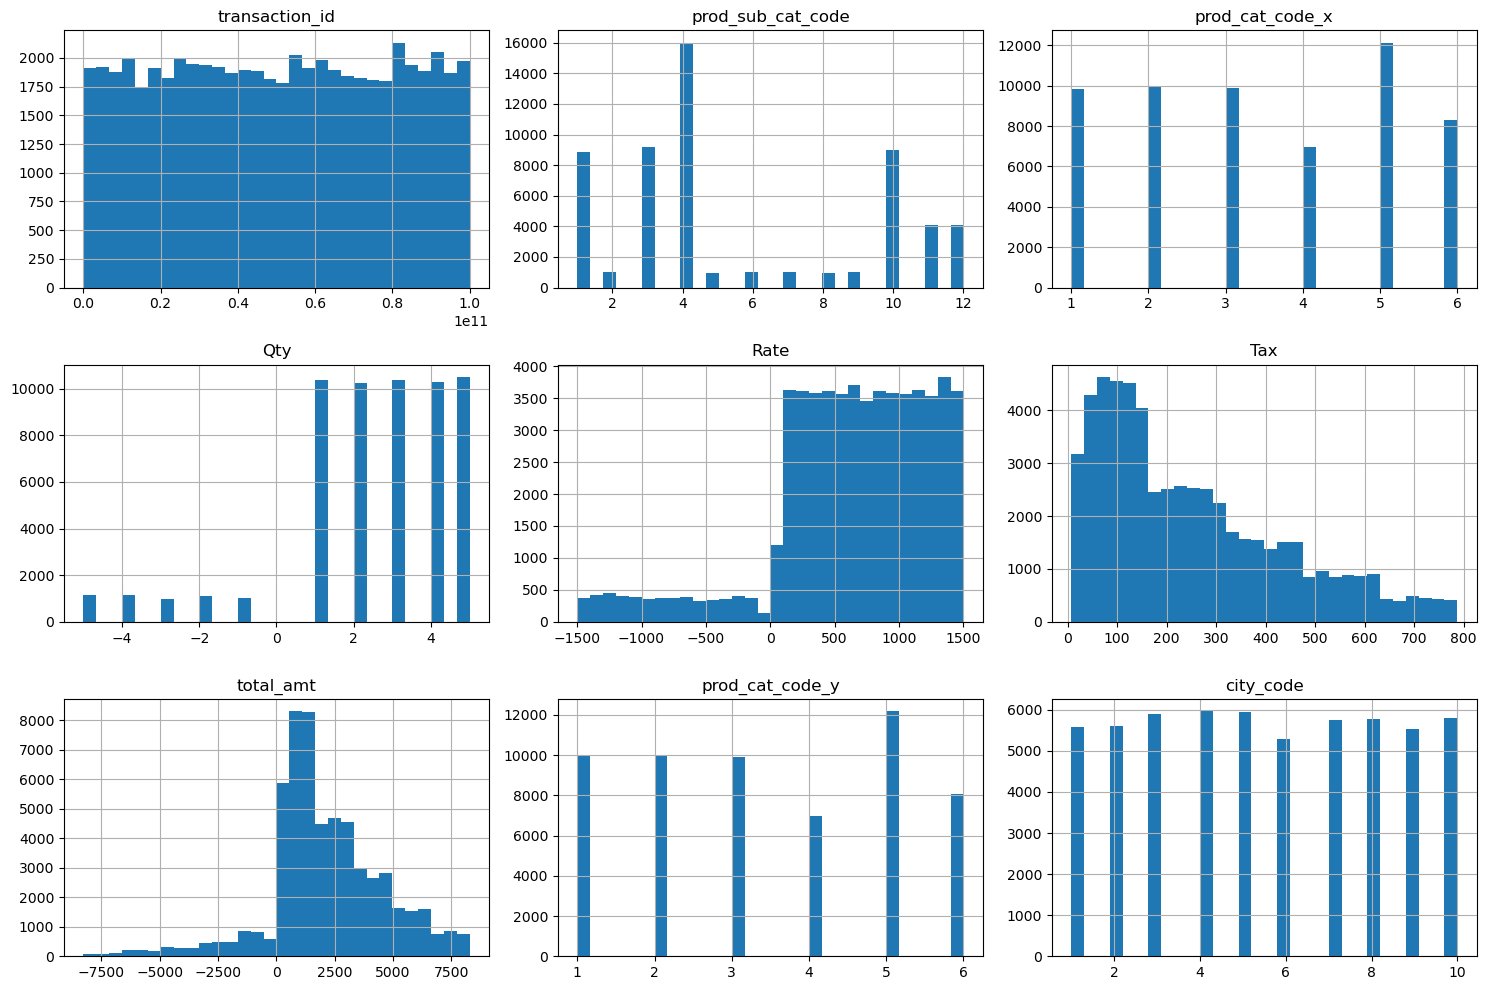

In [26]:
continuous_vars.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


Bar Charts for Categorical Variables

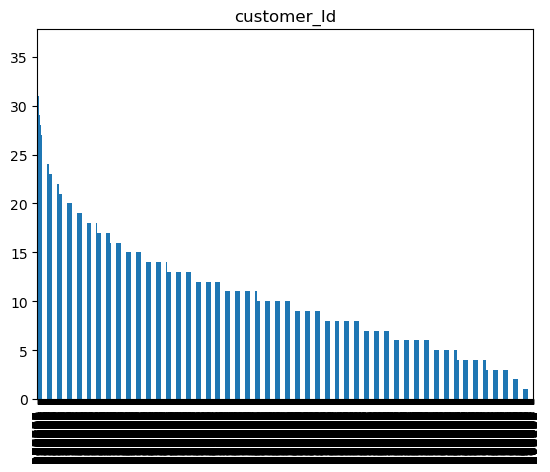

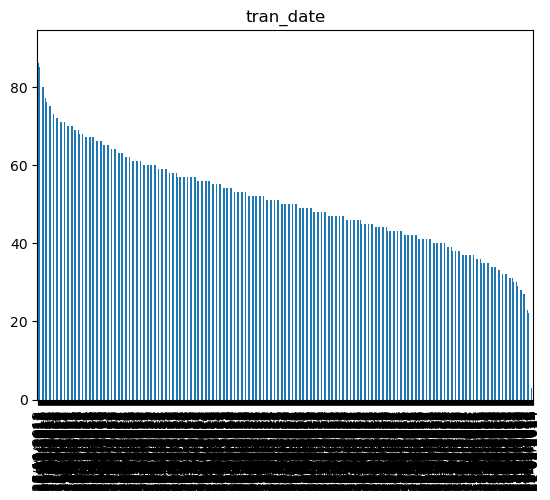

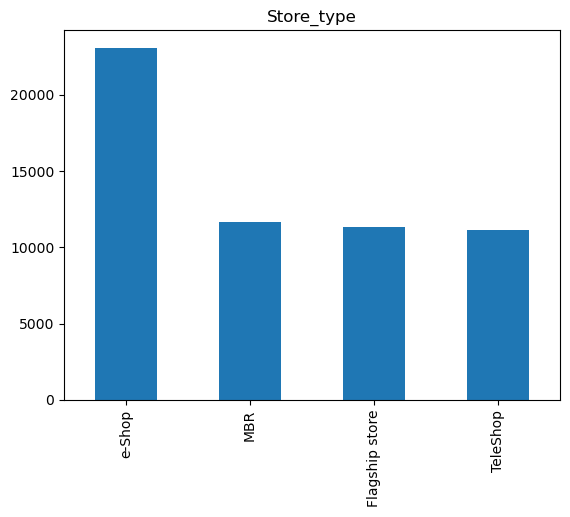

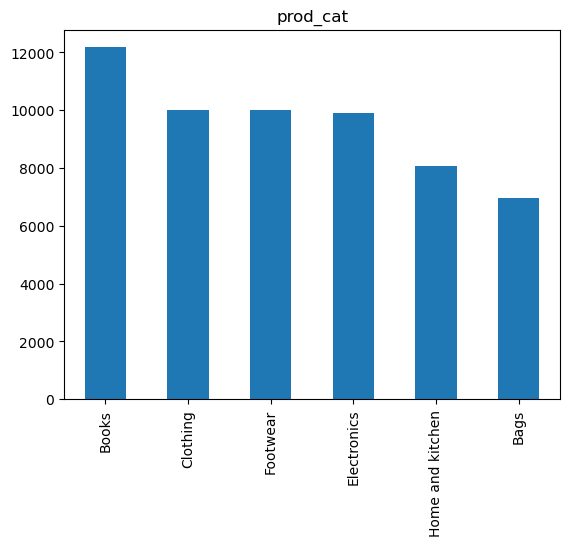

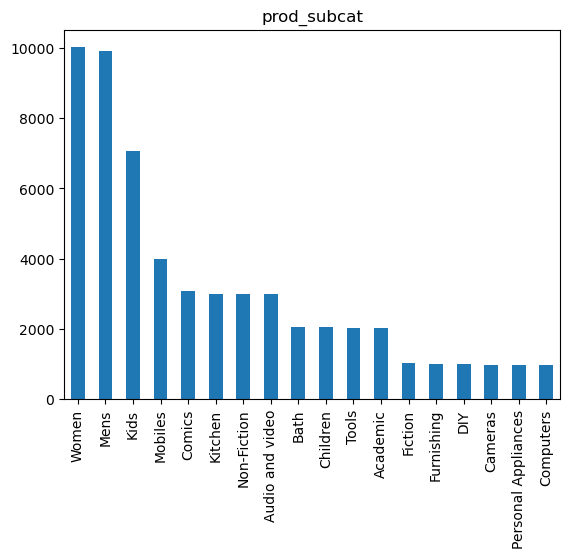

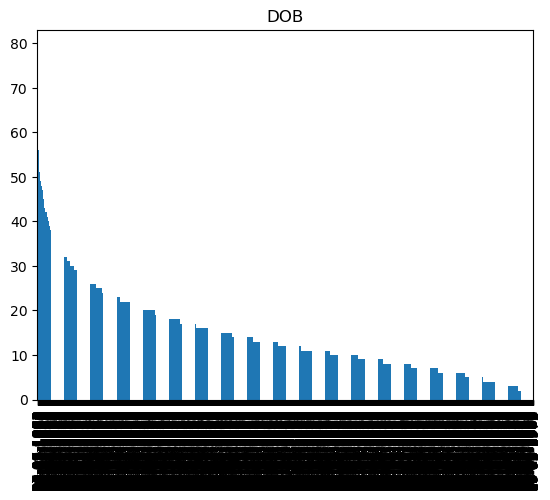

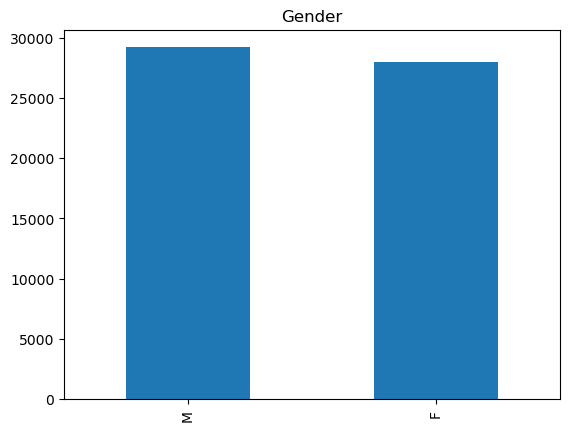

In [32]:
for col in categorical_vars.columns:
    customer_final[col].value_counts().plot(kind='bar', title=col)
    plt.show()


In [64]:
print(customer_final.columns.tolist())


['transaction_id', 'customer_Id', 'tran_date', 'prod_sub_cat_code', 'prod_cat_code_x', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat_code_y', 'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code', 'age']


In [65]:
#if the column is named 'Transaction_Date'
customer_final.rename(columns={'Transaction_Date': 'transaction_date'}, inplace=True)


Question 4: Transaction Time and Negatives
a. Time Period

In [66]:
# Convert 'tran_date' to datetime format
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], errors='coerce')

start_date = customer_final['tran_date'].min()
end_date = customer_final['tran_date'].max()

print(f"Transaction data ranges from {start_date.date()} to {end_date.date()}")


Transaction data ranges from 2011-01-02 to 2014-12-02


b. Negative Transactions

In [67]:
negative_txns = customer_final[customer_final['total_amt'] < 0]
print("Count of negative transactions:", negative_txns.shape[0])


Count of negative transactions: 5430


In [68]:
print(customer_final.columns.tolist())


['transaction_id', 'customer_Id', 'tran_date', 'prod_sub_cat_code', 'prod_cat_code_x', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat_code_y', 'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code', 'age']


Question 5: Category Popularity by Gender

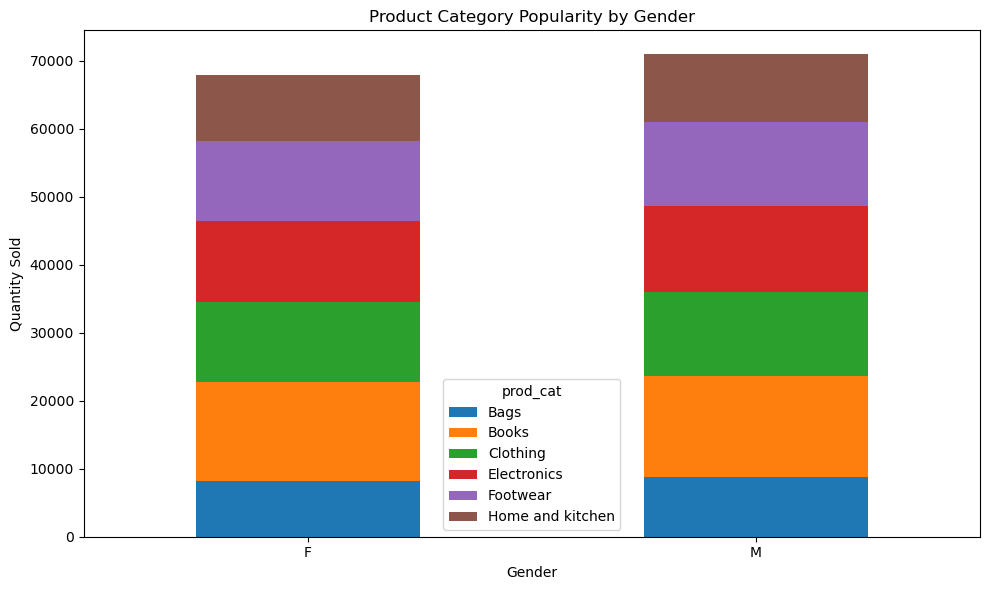

In [69]:
gender_popularity = customer_final.groupby(['Gender', 'prod_cat'])['Qty'].sum().unstack()
gender_popularity.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Product Category Popularity by Gender')
plt.ylabel('Quantity Sold')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Question 6: City Code with Max Customers

In [70]:
city_counts = customer['city_code'].value_counts()
max_city = city_counts.idxmax()
percentage = (city_counts.max() / city_counts.sum()) * 100
print(f"City Code with Max Customers: {max_city}, Percentage: {percentage:.2f}%")


City Code with Max Customers: 3.0, Percentage: 10.54%


Question 7: Store Type Performance

In [71]:
store_value = customer_final.groupby('Store_type')['total_amt'].sum()
store_qty = customer_final.groupby('Store_type')['Qty'].sum()

print("Store Performance by Value:\n", store_value.sort_values(ascending=False))
print("\nStore Performance by Quantity:\n", store_qty.sort_values(ascending=False))


Store Performance by Value:
 Store_type
e-Shop            49096588.71
Flagship store    24072659.26
MBR               24018167.29
TeleShop          22980349.08
Name: total_amt, dtype: float64

Store Performance by Quantity:
 Store_type
e-Shop            56372
MBR               27869
Flagship store    27600
TeleShop          27059
Name: Qty, dtype: int64


Question 8: Electronics and Clothing in Flagship

In [72]:
flagship_sales = customer_final[
    (customer_final['Store_type'] == 'Flagship store') &
    (customer_final['prod_cat'].isin(['Electronics', 'Clothing']))
]

# Group and sum total amount by product category
flagship_total = flagship_sales.groupby('prod_cat')['total_amt'].sum()
print("Total amount earned from Electronics and Clothing in Flagship Stores:")
print(flagship_total)


Total amount earned from Electronics and Clothing in Flagship Stores:
prod_cat
Clothing       4177586.205
Electronics    4349256.795
Name: total_amt, dtype: float64


Question 9. Male Customers in Electronics

In [73]:
male_electronics = customer_final[
    (customer_final['Gender'] == 'M') &
    (customer_final['prod_cat'] == 'Electronics')
]
# Calculate total amount
total_male_electronics = male_electronics['total_amt'].sum()
print("Total Amount from Male Customers (Electronics):", total_male_electronics)


Total Amount from Male Customers (Electronics): 10947130.025


Question 10: Customers with>10 Uniques Transaction 

In [74]:
# Filter out transactions with negative amounts
valid_txns = customer_final[customer_final['total_amt'] >= 0]

# Count unique transactions per customer
txn_counts = valid_txns.groupby('customer_Id')['transaction_id'].nunique()

# Filter customers with more than 10 unique transactions
high_txn_customers = txn_counts[txn_counts > 10]
print("Number of Customers with >10 Unique Transactions:", high_txn_customers.count())


Number of Customers with >10 Unique Transactions: 6


Question 11: Customer Aged 25-35
a. Total Amount for Electronics and Books

In [75]:
# Convert DOB to datetime
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], errors='coerce')

#Calculate age from DOB
today = pd.to_datetime('today')
customer_final['age'] = (today - customer_final['DOB']).dt.days // 365

#Filter for age between 25 and 35, and categories Electronics & Books
age_filtered = customer_final[
    (customer_final['age'] >= 25) &
    (customer_final['age'] <= 35) &
    (customer_final['prod_cat'].isin(['Electronics', 'Books']))
]

#Total amount spent
total_spent = age_filtered['total_amt'].sum()
print("Total Amount (Age 25–35, Electronics & Books):", total_spent)


Total Amount (Age 25–35, Electronics & Books): 6449995.5


b. Amount Spent Between Jan1-MAr1,2014

In [63]:
# Filter for transactions between 1st Jan and 1st Mar 2014
date_filtered = age_filtered[
    (age_filtered['tran_date'] >= '2014-01-01') &
    (age_filtered['tran_date'] <= '2014-03-01')
]
total_amount = date_filtered['total_amt'].sum()
print("Total Amount (Jan–Mar 2014):", total_amount)


Total Amount (Jan–Mar 2014): 199909.97
